In [1]:
## this makes figure 4 of the LVDB overview paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table


In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## load complete dwarf table and more distant dwarfs and combine table
dwarf_all = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_all.csv')
lf_distant = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field_distant.csv')

# x = ['ref_proper_motion', 'ref_metallicity_photometric']
# dwarf_all.remove_columns(x)
# lf_distant.remove_columns(x)
# comb = table.vstack((dwarf_all, lf_distant))

In [5]:
## load locally
dwarf_all = table.Table.read('../data/dwarf_all.csv')
lf_distant = table.Table.read('../data/dwarf_local_field_distant.csv')

## not used for this example and the dwarf_local_field_distant table is missing all entries of this column
x = ['ref_proper_motion', 'ref_metallicity_photometric']
dwarf_all.remove_columns(x)
lf_distant.remove_columns(x)
comb = table.vstack((dwarf_all, lf_distant))

In [6]:
## separate based on whether system has a host or not
## note that "hosts" will be consider isolated
keep = np.zeros(len(comb), dtype=bool)
for i in range(len(comb)):
    if np.ma.is_masked(comb['host'][i])==False:
        keep[i] = True
    else:
        keep[i] = False
close_has_host = comb[keep]
isolated_close = comb[~keep]
len(close_has_host), len(comb), len(isolated_close)

(312, 390, 78)

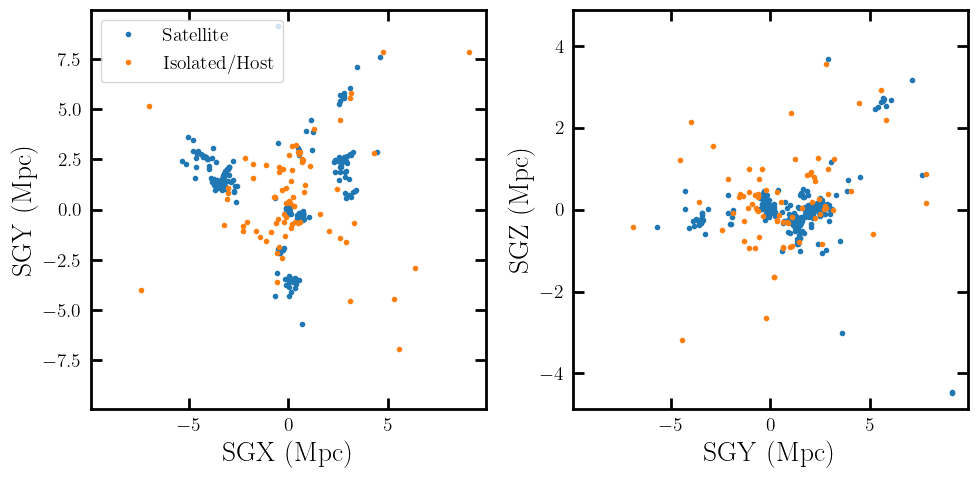

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(close_has_host['sg_xx']/1000., close_has_host['sg_yy']/1000., '.', label=r'${\rm Satellite}$')
ax[0].plot(isolated_close['sg_xx']/1000., isolated_close['sg_yy']/1000., '.', label=r'${\rm Isolated/Host}$')

ax[1].plot(close_has_host['sg_yy']/1000., close_has_host['sg_zz']/1000., '.')
ax[1].plot(isolated_close['sg_yy']/1000., isolated_close['sg_zz']/1000., '.')
ax[0].legend(loc=2)
ax[0].set_xlabel(r'${\rm SGX~(Mpc)}$')
ax[0].set_ylabel(r'${\rm SGY~(Mpc)}$')
ax[1].set_xlabel(r'${\rm SGY~(Mpc)}$')
ax[1].set_ylabel(r'${\rm SGZ~(Mpc)}$')

## this makes the axis limits have the same min/max and can see structure
xmax = np.max([abs(ax[0].get_xlim()[0]),abs(ax[0].get_xlim()[1]), abs(ax[0].get_ylim()[0]), abs(ax[0].get_ylim()[1])])
ax[0].set_xlim(-xmax, xmax)
ax[0].set_ylim(-xmax, xmax)

xmax = np.max([abs(ax[1].get_xlim()[0]),abs(ax[1].get_xlim()[1])])
ymax = np.max([abs(ax[1].get_ylim()[0]),abs(ax[1].get_ylim()[1])])
ax[1].set_xlim(-xmax, xmax)
ax[1].set_ylim(-ymax, ymax)

plt.tight_layout()
plt.savefig('supergalactic_overview.pdf')
plt.show()